In [92]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
class Network(object):
    
    def  __init__(self, sizes):
        #define Hyperparameters
        self.numLayers = len(sizes)
        self.sizes = sizes
        self.weights = [np.random.randn(x, y) for x, y in zip(sizes[:-1], sizes[1:])]
        
    def forward(self, X):
        #return output when input is X
        a = X
        self.Z = []
        self.A = [X]
        for w in self.weights:
            zi = np.dot(a, w)
            self.Z.append(zi)
            a = self.sigmoid(zi)
            self.A.append(a)
        return self.A[-1]
    
    def back(self, X, y):
        #backpropagates error to weights from inputs X and expected output O
        #derivaive of sigmoid(output sum[sigmoid**-1(forward)])
        dj = self.costFunctionPrime(X, y)
        scalar = 3
        for i in range(0, len(dj)):
            N.weights[i] = N.weights[i] - scalar*dj[i]  
        cost2 = self.costFunction(X, y)
        return cost2
        
    
    def sigmoid(self, z):
        return 1.0/(1.0+np.exp(-z))
    
    def sigmoidPrime(self, z):
        return self.sigmoid(z)*(1-self.sigmoid(z))
    
    def costFunction(self, X, y):
        self.yHat = self.forward(X)
        s = [0.5*(y-yH)**2 for y, yH in zip(y, self.yHat)]
        return sum(s)
    
    def costDerivative(self, oa, y):
        return y-oa
    
    def costFunctionPrime(self, X, y):
        self.yHat = self.forward(X)
        dJdWx = [[0]]*(self.numLayers-1)
        #first delta
        d = np.multiply(self.costDerivative(y, self.yHat), self.sigmoidPrime(self.Z[-1]))
        dJdWx[-1] = np.dot(self.A[-2].T, d)
        #propagation
        for l in range(2, self.numLayers):
            zi = self.Z[-l]
            sp = self.sigmoidPrime(zi)
            d = np.multiply(np.dot(d, self.weights[-l+1].T), sp)
            dJdWx[-l] = np.dot(self.A[-l-1].T, d)
        return dJdWx
            

In [147]:
N = Network([2, 4, 1])
print(N.weights)
X = np.array(([0,0], [0,1], [1,0], [1,1]))
y = np.array(([0], [1], [1], [0]))

[array([[ 0.41638907, -1.8644603 , -0.66217704,  0.13080592],
       [ 0.56510525, -1.7645537 , -0.63221136,  0.61485034]]), array([[-1.20572248],
       [ 0.07139261],
       [ 1.07705036],
       [-2.48387609]])]


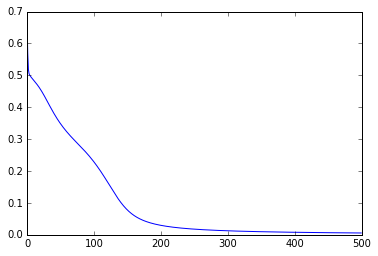

In [148]:
cost = []
it = 500
for i in range(it):   
    cost.append(N.back(X, y))
plt.plot(range(it), cost)

In [149]:
N.forward(X)

array([[ 0.06070815],
       [ 0.94535481],
       [ 0.94576462],
       [ 0.04251261]])

In [150]:
N.weights

[array([[ 1.55517937, -5.5264424 , -5.47572166, -2.72544463],
        [-2.73439498, -5.37766233,  2.77135294,  5.4247945 ]]),
 array([[  3.84079575],
        [-12.43901156],
        [  7.93932101],
        [ -4.81920163]])]

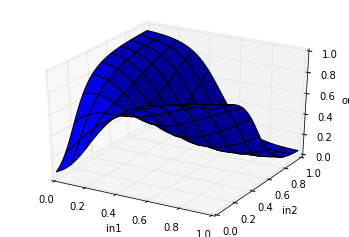

In [151]:
#Test network for various combinations:
in1 = np.linspace(0, 1, 100)
in2 = np.linspace(0, 1, 100)

#Create 2-d versions of input for plotting
a, b  = np.meshgrid(in1, in2)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()


allOutputs = N.forward(allInputs)
yy = np.dot(in1.reshape(100,1), np.ones((1,100)))
xx = np.dot(in1.reshape(100,1), np.ones((1,100))).T

#3D plot:

##Uncomment to plot out-of-notebook (you'll be able to rotate)
#%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xx, yy, allOutputs.reshape(100, 100))

ax.set_xlabel('in1')
ax.set_ylabel('in2')
ax.set_zlabel('out')

In [127]:
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

In [128]:
X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100